In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
file = 'datasets/housing/housing.csv'
df = pd.read_csv(file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207BFF38400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000207C0ABC1D0>]], dtype=object)

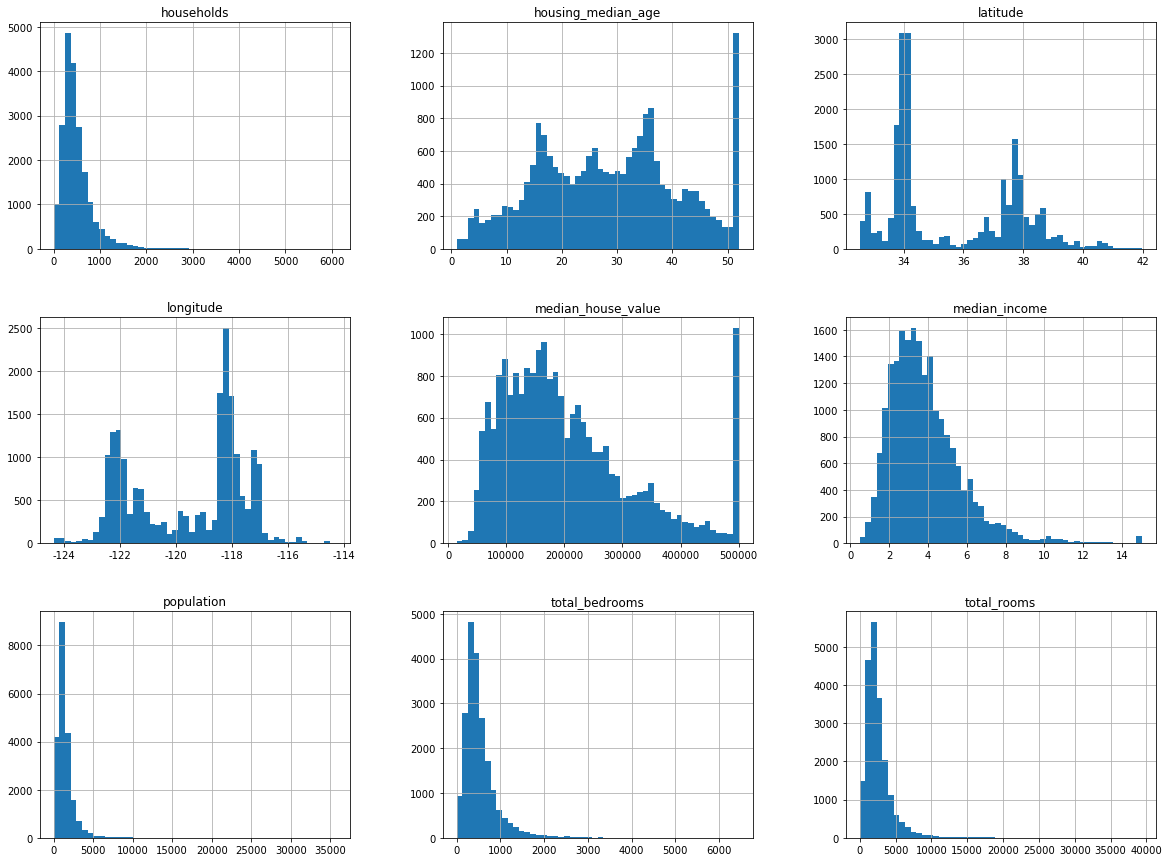

In [9]:
df.head()
df.info()
df.describe()
df.hist(bins=50, figsize=(20,15)) #bins 柱子的数量

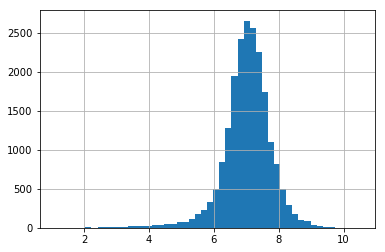

In [16]:
import numpy as np
np.log(df.population).hist(bins=50)

In [18]:
df['income_cat'] = np.ceil(df['median_income']/1.5)
df['income_cat'].where(df['income_cat'] < 5 , 5.0, inplace=True)
#DataFrame.where()
#Return an object of same shape as self and whose corresponding entries are from self where cond is True and otherwise are from other.

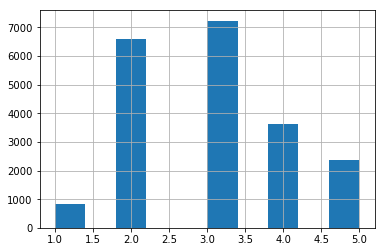

In [19]:
df.income_cat.hist()

In [55]:
df.income_cat.value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

#### 基于分类的分层抽样，保证样本分割后各分类的比例不变
2018年1月10日 21:54:33

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [53]:
train_set.income_cat.value_counts()/len(train_set)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

In [54]:
test_set.income_cat.value_counts()/len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)

train_idx, test_idx = [idx for idx in split.split(df, df.income_cat)][0]

strat_train_set = df.loc[train_idx]
strat_test_set = df.loc[test_idx]

In [49]:
df.income_cat.value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [50]:

strat_train_set.income_cat.value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [51]:

strat_test_set.income_cat.value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64